In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# in each case below, append the name of the dataset.csv
web_path = 'https://www.openintro.org/data/csv/' # url path to openintro.org data
loc_path = %pwd # local path if you had downloaded the data

# Chapter 1

---

## `stent30`, `stent365`

In [31]:
p_30 = pd.read_csv(web_path+"stent30.csv", header=0, names=['group', '0-30 days'])
p_365 = pd.read_csv(web_path+"stent365.csv", header=0, names=['group', '0-365 days'])

one_one = p_30.merge(p_365, 
    on='group', 
    left_index=True,
    right_index=True
    ).set_index(np.arange(1, 452))

one_one.index.name = 'patient'
one_one

,group,0-30 days,0-365 days
patient,,,
1,treatment,stroke,stroke
2,treatment,stroke,stroke
3,treatment,stroke,stroke
4,treatment,stroke,stroke
5,treatment,stroke,stroke
...,...,...,...
447,control,no event,no event
448,control,no event,no event
449,control,no event,no event


In [12]:
time_points = {
    '0-30':(p_30
            .pivot_table(index='group', 
            columns=['0-30 days'], 
            aggfunc=len)[::-1].T[::-1]),
            
    '0-365':(p_365
            .pivot_table(index='group', 
            columns=['0-365 days'], 
            aggfunc=len)[::-1].T[::-1])
    
} ## [::-1].T[::-1] to sort the table

one_two = pd.concat(
    time_points, 
    names=['days', 'outcome'],
    ).T

one_two

days        0-30           0-365         
outcome   stroke no event stroke no event
group                                    
treatment     33      191     45      179
control       13      214     28      199

---

## `email50`

In [8]:
one_three = pd.read_csv(
    web_path+"email50.csv", 
    header=0)
one_three.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none
3,0,0,1,0,0,2012-01-04 09:49:52,0,0,0,no,...,0,0,2.454,61,0,0,0,0,1,small
4,0,0,1,0,0,2012-01-27 01:34:45,0,0,9,no,...,0,1,41.623,1088,1,0,0,0,43,small


---
## `country`

*Does not contain `fed_spend` column as is assumed in the book*

In [18]:
one_five = pd.read_csv(
    web_path+"county.csv", 
    header=0)
one_five

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none
3140,Washakie County,Wyoming,8289.0,8533,8064.0,-4.31,12.8,70.9,10.0,4.08,no,some_college,27494.83,51362.0,none


C:\Users\pluto\Miniconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


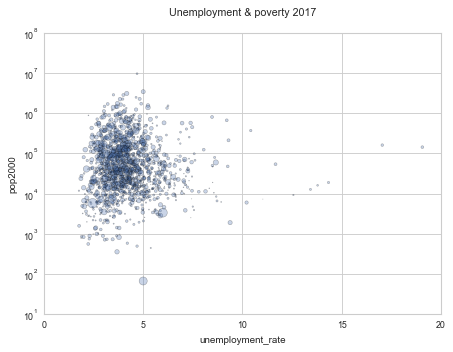

In [104]:
plt.style.use('seaborn-whitegrid')
ax = one_five.plot(kind='scatter',y='pop2000', x='unemployment_rate', s=(one_five.pop_change * 2),alpha=0.3);
ax.set_yscale('log');
# ax.set_title('Unemployment & poverty 2017\n');